<a href="https://colab.research.google.com/github/tahamsi/computer-vision/blob/main/week-6/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/tahamsi/computer-vision)

##Linear Regression
is a simple machine learning method used to model the relationship between a dependent variable (often called the response or outcome) and one or more independent variables (also called predictors or features). It assumes that this relationship is linear, meaning that the dependent variable can be expressed as a linear combination of the independent variables.

**Key Components:**


*   Dependent Variable (y): The outcome you're trying to predict or explain (e.g., house prices, sales).
*   Independent Variables (X): The input variables that influence the dependent variable (e.g., number of rooms, square footage).
*   Regression Coefficients (w): These are the weights or parameters the model learns to minimize the difference between the predicted and actual values.

*   Intercept (b): A constant value representing the point where the regression line crosses the y-axis (when all independent variables are zero).
*   Error Term (e): The difference between the actual observed values and the predicted values. It's assumed to be normally distributed.

**Mathematical Formula:**

For simple linear regression (one independent variable):

$y = b + w \times x + e$

Where:

* $y$ is the dependent variable,
* $x$ is the independent variable,
* $b$ is the intercept,
* $w$ is the coefficient (slope of the line),
* $e$ is the error term.

For multiple linear regression (multiple independent variables):

$y = b + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 +...+ w_n \times x_n$

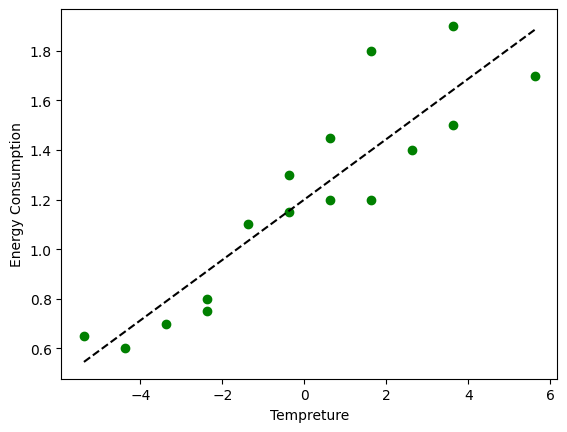

# Prepare the environment

**TensorFlow** is an open-source machine learning framework developed by the Google Brain team. It is widely used for various machine learning and deep learning tasks. **TensorFlow** is particularly popular for deep learning applications, such as image and speech recognition, natural language processing, and generative models.

*Make sure that TensorFlow is installed on your notebook.*

*If you are running this notebook in Google Colab, navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save. This will ensure your notebook uses a GPU, which will significantly speed up model training times.*

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

In [ ]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

##Use case

Here’s a simple IoT-based smart home dataset for linear regression, where the goal is to predict the energy consumption of a smart home based on temperature, humidity, and light intensity. This dataset will be useful for modeling linear relationships between these features and energy consumption.

Explanation of Columns:
* Temperature (°C): The current temperature in the home.
* Humidity (%): The humidity level in the home.
* Light Intensity (lux): The intensity of light measured in lux.
* Energy Consumption (kWh): The energy consumed by the smart home appliances in kilowatt-hours (kWh). This is the dependent variable (the target).

**Use Case for Linear Regression**:

In this dataset, the goal is to predict Energy Consumption (kWh) (dependent variable) based on Temperature, Humidity, and Light Intensity (independent variables). The relationship between energy consumption and these factors can be modeled using linear regression, where energy consumption is expected to increase or decrease with changes in temperature, humidity, and light intensity.

Example of a Linear Regression Equation:

$Energy Consumption = b + w_1 × Temperature + w_2 × Humidity + w_3 × Light Intensity$


In [ ]:
# Upload the file
# URL of the raw CSV file on GitHub
url =  'https://github.com/tahamsi/computer-vision/blob/main/week-6/smart_home_regression.csv?raw=true'
# Read the CSV into a pandas DataFrame
data = pd.read_csv(url)
data.head()

In [ ]:
# Defining dependent and independent variables
data = data.to_numpy()
X = data[:,:3]
Y = data[:,3]
X = X - X.mean(axis=0)

In [ ]:
# Visualisation
plt.subplot(3, 1, 1)
plt.scatter(data[:,0],data[:,3])
plt.xlabel("Tempreture")
plt.ylabel("Energy Consumption")
plt.subplot(3, 1, 2)
plt.scatter(data[:,1],data[:,3])
plt.xlabel("Humidity")
plt.ylabel("Energy Consumption")
plt.subplot(3, 1, 3)
plt.scatter(data[:,2],data[:,3])
plt.xlabel("Light_Intensity")
plt.ylabel("Energy Consumption")
plt.tight_layout()

##Define a Linear Regression Model

You can use the same API as for a neural network; the only thing to consider is that the output is linear.

For futher information check [Functional API](https://www.tensorflow.org/api_docs/python/tf/keras/Model?_gl=1*1jhprjy*_up*MQ..*_ga*NTQ3NDYzMzA2LjE3Mjg2Nzk0Njg.*_ga_W0YLR4190T*MTcyODY3OTQ2OC4xLjAuMTcyODY3OTY0Mi4wLjAuMA..)

In [ ]:
# Define the model structure
inputs = Input(shape=(3,)) # Shape refers to the number of independent variables (features) in the dataset.
output = Dense(1)(inputs)
model = Model(inputs=inputs, outputs=output)

**Compile** the model using the mean squared error (MSE) loss function, as it is appropriate for linear models.

**Mean Squared Error** ([MSE](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MSE?_gl=1*qor7za*_up*MQ..*_ga*NTQ3NDYzMzA2LjE3Mjg2Nzk0Njg.*_ga_W0YLR4190T*MTcyODY3OTQ2OC4xLjAuMTcyODY3OTQ2OC4wLjAuMA..)) is a commonly used loss function for regression tasks, especially in linear regression. It measures the average of the squares of the differences between the predicted values and the actual (true) values.

Formula for MSE:

$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$

Where:
* $n$ is the number of data points.
* $y_i$ is the actual value for the $i$-th data point.
* $\hat{y}_i$ is the predicted value for the $i$-th data point.

**Further Parameters**

In TensorFlow, when compiling a model, you typically specify an optimizer, a loss function, and one or more metrics. Here are some commonly used optimizers, loss functions, and metrics:

**Optimizers**:
*   SGD (Stochastic Gradient Descent): Classic optimization algorithm.
*   Adam: A popular adaptive learning rate optimization algorithm.
*   RMSprop: Another adaptive learning rate optimization algorithm.
*   Adagrad: Adapts the learning rates individually for each parameter.


**Loss Functions**:
*   Mean Squared Error (MSE): It is already explained.
*   Binary Cross-Entropy: Used for binary classification tasks.
*   Categorical Cross-Entropy: Suitable for multiclass classification.
*   Sparse Categorical Cross-Entropy: Used when your targets are integers (e.g., class indices).
*   Kullback-Leibler Divergence (KLD): Used in variational autoencoders and other probabilistic models.

**Metrics**:
*   Accuracy: Commonly used for classification tasks.
*   Precision: Measures the true positive rate in binary classification.
*   Recall: Measures the ability to find all relevant instances in binary classification.
*   F1 Score: Combines precision and recall into a single metric.
*   Mean Absolute Error (MAE): Useful for regression problems.
*   Mean Squared Error (MSE): Another metric for regression tasks.
*   Categorical Accuracy: Used for multiclass classification.

*You can choose the appropriate optimizer, loss function, and metrics based on your specific task and model architecture.*

Source: https://www.tensorflow.org/

In [ ]:
model.compile(optimizer = 'adam', loss='mse')

** Fit the model**

tensorflow.keras.models.Model.fit function accepts various parameters to configure the training of a neural network model. Some of the most commonly used parameters include:
*   x: The input data, usually as a NumPy array or a TensorFlow tensor.
*   y: The target data (labels) that the model is learning to predict.
*   batch_size: The number of samples per gradient update.
*   epochs: The number of training iterations over the entire dataset.
*   validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch.
*   callbacks: A list of callback objects that perform actions at various stages during training.
*   verbose: Verbosity mode (0, 1, or 2) controlling the amount of information printed during training.
*   shuffle: A boolean indicating whether to shuffle the training data before each epoch.
*   initial_epoch: The epoch at which to start training (useful for resuming a previous training session).
*   steps_per_epoch: The number of batches to draw from the generator at each epoch.
*   validation_steps: The number of batches to draw from the generator for validation.

There are additional parameters for more advanced use cases, such as class weight, sample weight, and more, but the above list covers the basic parameters for training a model. You can refer to the TensorFlow documentation for more details and specific parameter options.

Source: https://www.tensorflow.org/

In [ ]:
r = model.fit(X,Y, epochs = 100)

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.legend()

In [ ]:
# Model parameters
b = model.layers[1].get_weights()[1][0]
w1 = model.layers[1].get_weights()[0][0,0]
w2 = model.layers[1].get_weights()[0][1,0]
w3 = model.layers[1].get_weights()[0][2,0]

print('b:', b , 'w1:', w1,'w2:', w2,'w3:',w3)